In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Phase 1 - Data Collection and Exploratory Data Analysis (EDA)

### Step 1 - Data Collection and Preprocessing

In [2]:
#import the dataset
data = pd.read_csv("employee_data.csv")

In [3]:
data.head()

EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           HR   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Marketing   65000               5   
4           5  David Johnson   50        Sales   75000              20   

   PerformanceScore Attrition  
0                80        No  
1                85        No  
2                95       Yes  
3                78        No  
4                88       Yes

In [4]:
data.isnull().sum()

EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64

In [5]:
data = data.drop_duplicates()

In [6]:
data['Salary']

0     55000
1     60000
2     80000
3     65000
4     75000
      ...  
95    53000
96    91000
97    75000
98    70000
99    87000
Name: Salary, Length: 100, dtype: int64

In [7]:
data.columns

Index(['EmployeeID', 'Name', 'Age', 'Department', 'Salary', 'YearsAtCompany',
       'PerformanceScore', 'Attrition'],
      dtype='object')

In [8]:
# Clean column names
data.columns = data.columns.str.strip()

# Convert Salary to numeric if needed
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')

# Fill missing values safely
data['Salary'] = data['Salary'].fillna(data['Salary'].mean())

In [9]:
data.head()

EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           HR   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Marketing   65000               5   
4           5  David Johnson   50        Sales   75000              20   

   PerformanceScore Attrition  
0                80        No  
1                85        No  
2                95       Yes  
3                78        No  
4                88       Yes

In [10]:
print(data['Salary'].describe())

count      100.000000
mean     72820.000000
std      12643.823102
min      43000.000000
25%      65000.000000
50%      72000.000000
75%      82750.000000
max      95000.000000
Name: Salary, dtype: float64


In [11]:
print(data['Salary'].isnull().sum())

0


In [12]:
data[['EmployeeID', 'Name', 'Salary']].head()

EmployeeID           Name  Salary
0           1       John Doe   55000
1           2     Jane Smith   60000
2           3  Michael Brown   80000
3           4    Emily Davis   65000
4           5  David Johnson   75000

### Step 2 - Exploratory Data Analysis (EDA)

In [13]:
print(data.describe())

       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


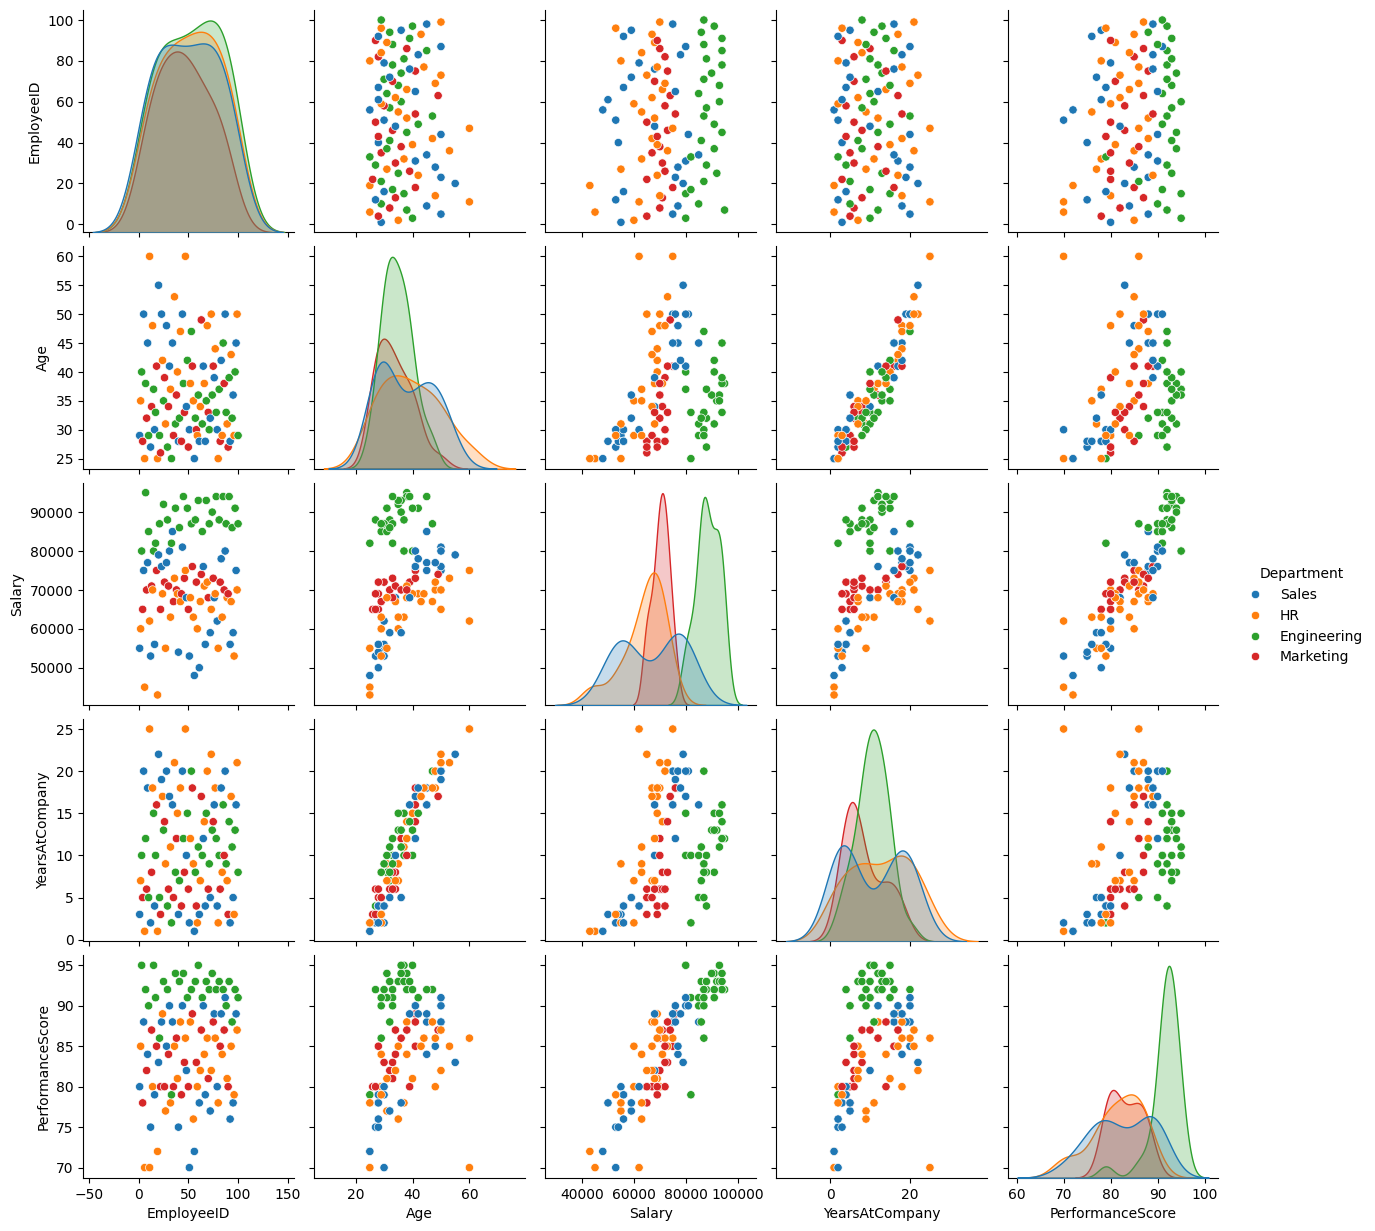

In [14]:
sns.pairplot(data, hue='Department')
plt.savefig("Department.png")
plt.show()

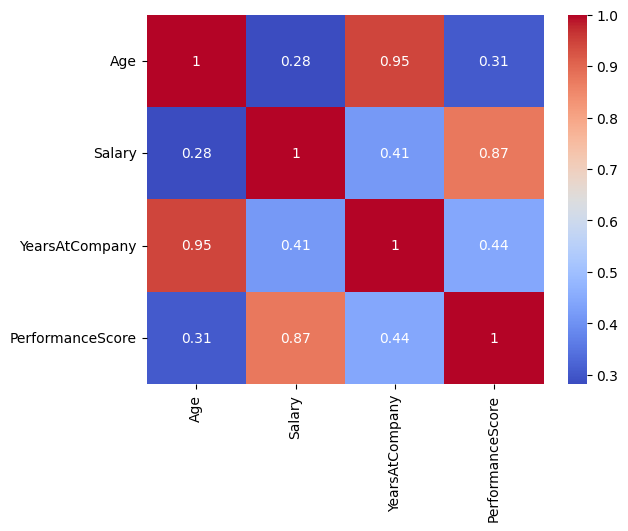

In [58]:
num_cols = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.savefig("heatmap_columns.png")
plt.show()

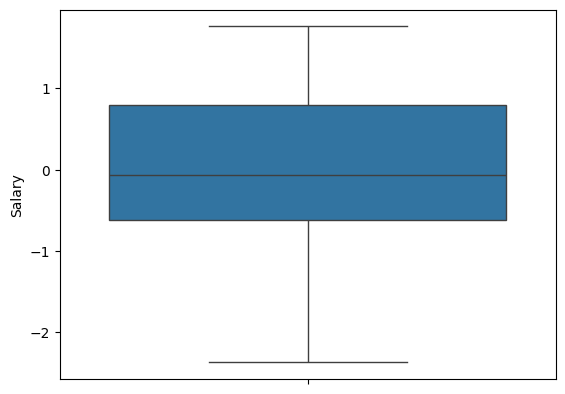

In [59]:
sns.boxplot(data['Salary'])
plt.savefig("salary.png")
plt.show()

### 

### Step 3 - Probability and Statistical Analysis

In [17]:
p_attrition = len(data[data['Attrition']=='Yes']) / len(data)
print("Probability of employee leaving:", p_attrition)

Probability of employee leaving: 0.39


In [18]:
dept_prob = data[data['Attrition']=='Yes']['Department'].value_counts() / data['Department'].value_counts()
print(dept_prob)

Department
Engineering    0.428571
HR             0.346154
Marketing      0.200000
Sales          0.538462
Name: count, dtype: float64


## Phase 2 - Predictive Modeling

### Step 4 - Feature Engineering and Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
le = LabelEncoder()
data['Department'] = le.fit_transform(data['Department'])
data['Attrition'] = le.fit_transform(data['Attrition'])

In [21]:
scaler = StandardScaler()
data[['Salary','PerformanceScore']] = scaler.fit_transform(
    data[['Salary','PerformanceScore']])

In [22]:
data.head()

EmployeeID           Name  Age  Department    Salary  YearsAtCompany  \
0           1       John Doe   29           3 -1.416484               3   
1           2     Jane Smith   35           1 -1.019042               7   
2           3  Michael Brown   40           0  0.570727              10   
3           4    Emily Davis   28           2 -0.621600               5   
4           5  David Johnson   50           3  0.173285              20   

   PerformanceScore  Attrition  
0         -0.781900          0  
1          0.009497          0  
2          1.592290          1  
3         -1.098459          0  
4          0.484335          1

### Step 5 - Employee Attrition Prediction Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
X = data.drop(['Attrition','Name','EmployeeID'], axis=1)
y = data['Attrition']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.44      0.57      0.50         7

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.63      0.60      0.61        20



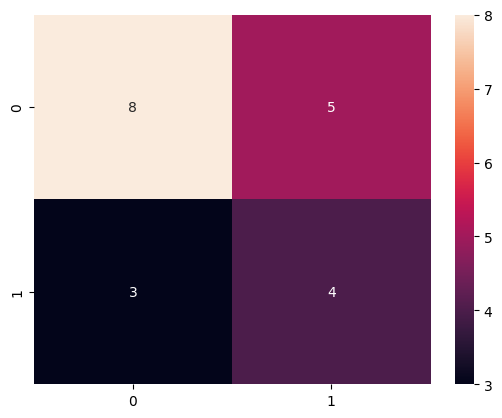

In [60]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.savefig("RandomForestClassifier_step5.png")
plt.show()

### Step 6 - Employee Performance Prediction Model

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
X = data.drop(['PerformanceScore','Name','EmployeeID'], axis=1)
y = data['PerformanceScore']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

R²: 0.7487625823959061
MSE: 0.32137623991304404


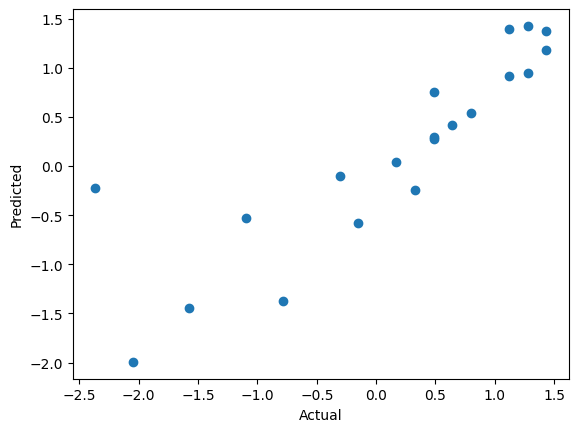

In [66]:
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("Actual_Predicted_step6.png")
plt.show()

## Phase 3 - Deep Learning Models

### Step 7 - Deep Learning for Employee Performance Prediction

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [69]:
X = data[['Age', 'Salary', 'YearsAtCompany']]
y = data['PerformanceScore']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),     
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

In [73]:
# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [74]:
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9118 - mae: 0.7645
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7983 - mae: 0.7183 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7273 - mae: 0.6847 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6758 - mae: 0.6630 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6463 - mae: 0.6478 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6247 - mae: 0.6372 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6040 - mae: 0.6250 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5849 - mae: 0.6107 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5676 - mae: 0.6010 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5502 - mae: 0.5903 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5346 - mae: 0.5821 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5179 - mae: 0.5730 
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━

In [75]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 0.4218 - mae: 0.4274
Mean Absolute Error: 0.4274432063102722


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


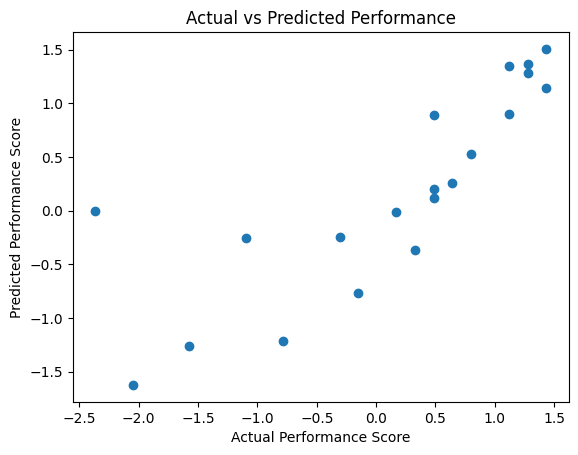

In [76]:
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance")
plt.savefig("Actual_Predicted_Score_Performance_step7.png")
plt.show()

### Step 8 - Employee Attrition Analysis with Deep Learning

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])  # Yes=1, No=0

In [79]:
X = data[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']]
y = data['Attrition']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model2 =  Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid') 
])

In [82]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
model2.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7250 - loss: 0.5561
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.5508 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.5504  
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.5491 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.5489 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.5469 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7250 - loss: 0.5462 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7250 - loss: 0.5460 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.5453 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7250 - loss: 0.5445 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.5439 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

In [84]:
loss, acc = model2.evaluate(X_test, y_test)
print(f"Model Accuracy: {acc*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.6000 - loss: 0.6374
Model Accuracy: 60.00%


In [85]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [86]:
y_pred = (model2.predict(X_test) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


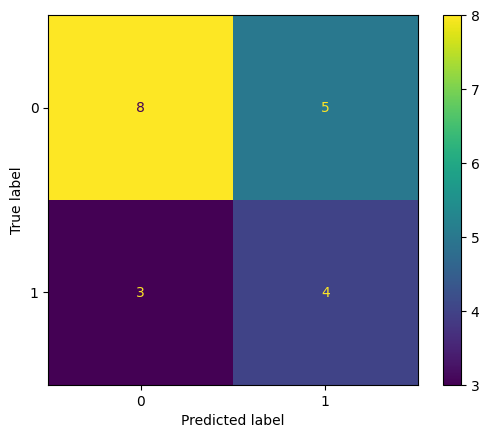

In [87]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig("confusion_matrix_step8.png")
plt.show()

## Phase 4 - Reporting and Insights

### Step 9 - Insights and Recommendations 
### Step 10 -Data Visualization and Reporting

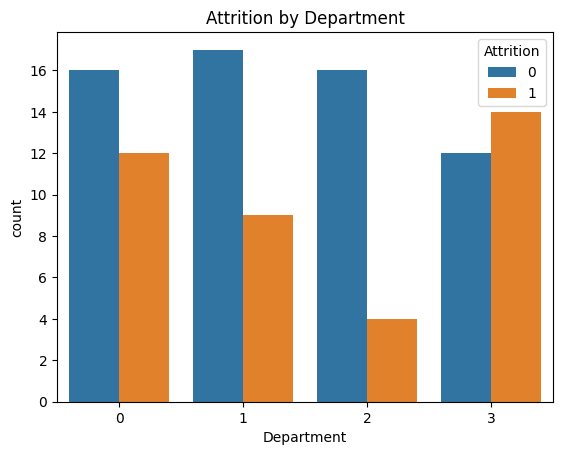

In [88]:
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Attrition by Department')
plt.savefig("Attrition by Department.png")
plt.show()

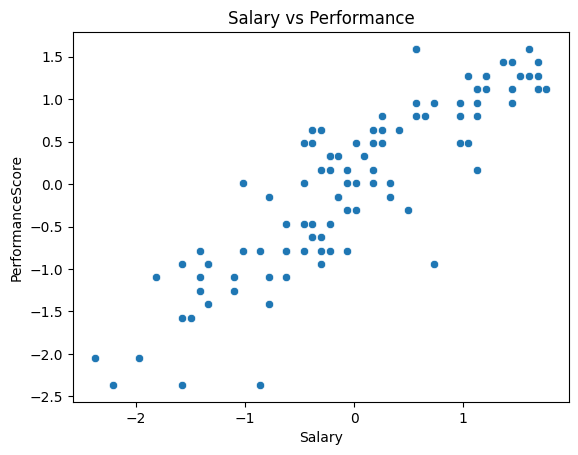

In [89]:
sns.scatterplot(x='Salary', y='PerformanceScore', data=data)
plt.title('Salary vs Performance')
plt.savefig("Salary vs Performance.png")
plt.show()

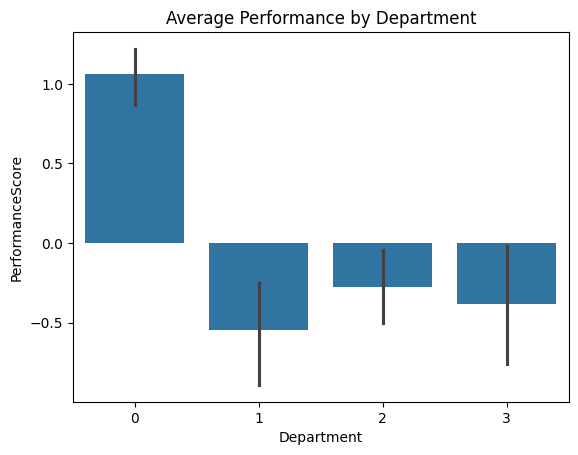

In [90]:
sns.barplot(x='Department', y='PerformanceScore', data=data)
plt.title('Average Performance by Department')
plt.savefig("Average Performance by Department.png")
plt.show()

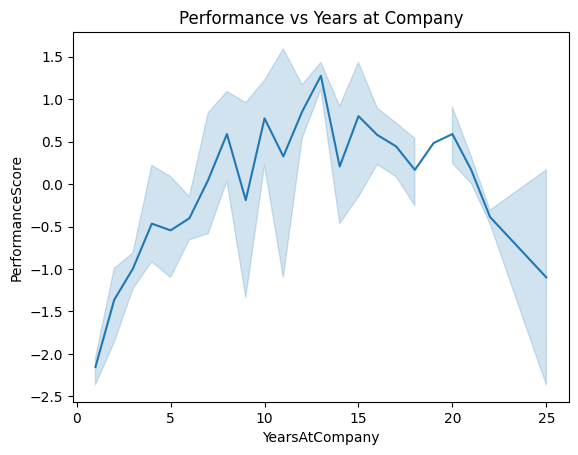

In [91]:
sns.lineplot(x='YearsAtCompany', y='PerformanceScore', data=data)
plt.title('Performance vs Years at Company')
plt.savefig("Performance vs Years at Company.png")
plt.show()